In [2]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('file:///C:/Users/SR%20COMPUTER/Downloads/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [7]:
df.min()

age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges     1121.8739
dtype: object

In [8]:
df.max()

age                  64
sex                male
bmi               53.13
children              5
smoker              yes
region        southwest
charges     63770.42801
dtype: object

In [9]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
age,4.0,0.362687,0.438551,0.042469,0.092571,0.204140,0.474256,1.0
bmi,4.0,0.330093,0.452989,0.012759,0.085144,0.153806,0.398756,1.0
children,4.0,0.280807,0.479993,0.012759,0.035041,0.055234,0.300999,1.0
charges,4.0,0.391337,0.416650,0.067998,0.165755,0.248675,0.474256,1.0


<AxesSubplot:>

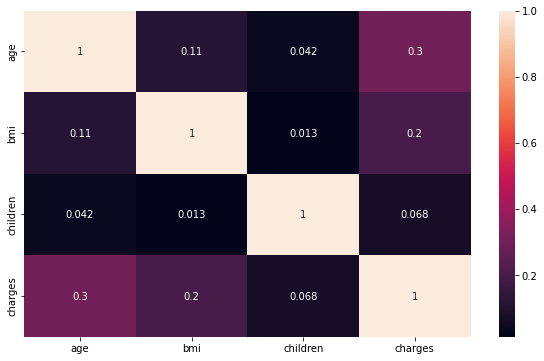

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

sex            2
smoker         2
region         4
children       6
age           47
bmi          548
charges     1337
dtype: int64

In [15]:
df.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [16]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "age" is
 18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64
-------------------------------------------------
unique values in column "sex" is
 male      676
female    662
Name: sex, dtype: int64
-------------------------------------------------
unique values in column "bmi" is
 32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
-------------------------------------------------
unique values in column "children" is
 0    574
1    324
2    240
3  

In [17]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [18]:
object_col

['sex', 'smoker', 'region']

In [19]:
num_col

['age', 'bmi', 'children', 'charges']

In [20]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
df.smoker.replace(('yes','no'),(1,0), inplace =True)
df.sex.replace(('female','male'),(1,0),inplace= True)

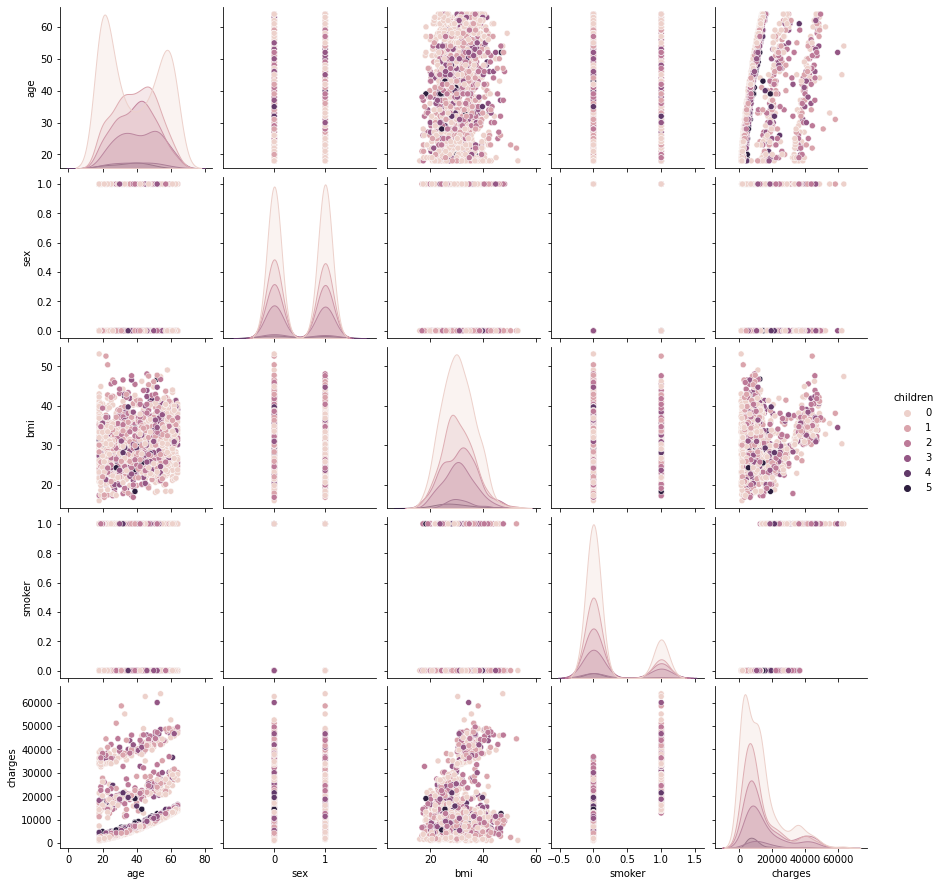

In [23]:
sns.pairplot(df, hue = 'children')

Text(0.5, 1.0, 'Region wise smokers count')

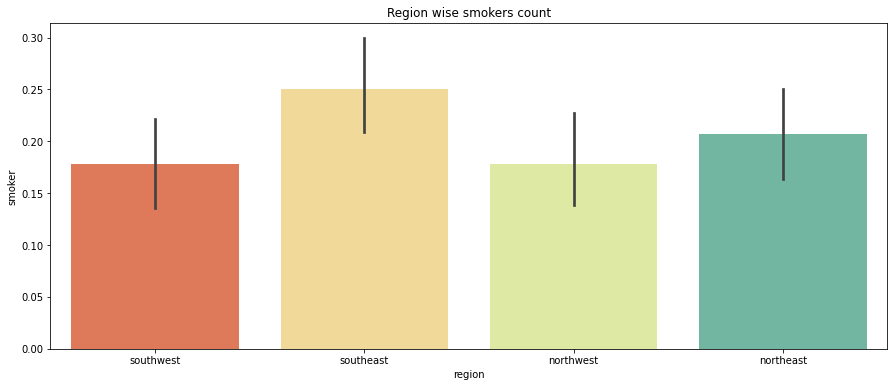

In [24]:
ax = plt.figure(figsize =(15,6))
sns.barplot(x = 'region', y = 'smoker', data = df, palette ='Spectral')
plt.title('Region wise smokers count')

Text(0.5, 1.0, 'Showing the distribution of number of children of the patients')

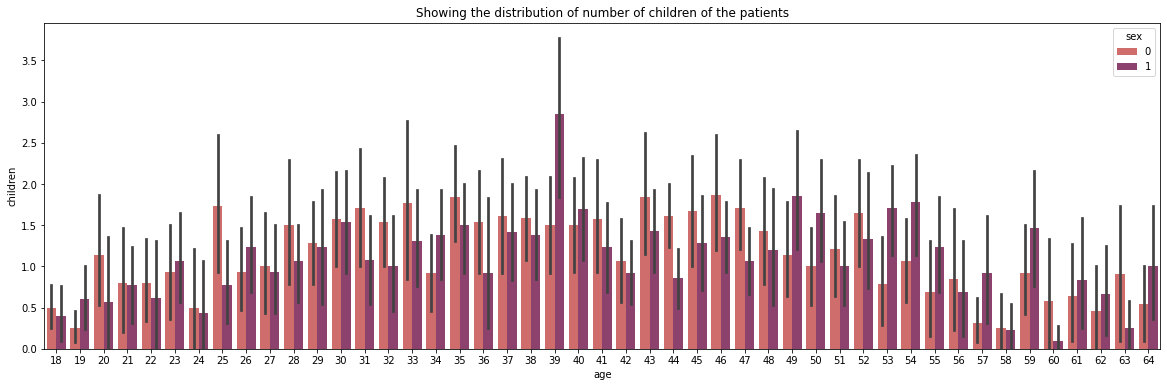

In [25]:
ax = plt.figure(figsize = (20,6))
sns.barplot(x = 'age', y = 'children', data= df, palette='flare', hue ='sex')
plt.title('Showing the distribution of number of children of the patients')

Text(0.5, 1.0, 'Responsiveness of the medical bill of age')

<Figure size 432x432 with 0 Axes>

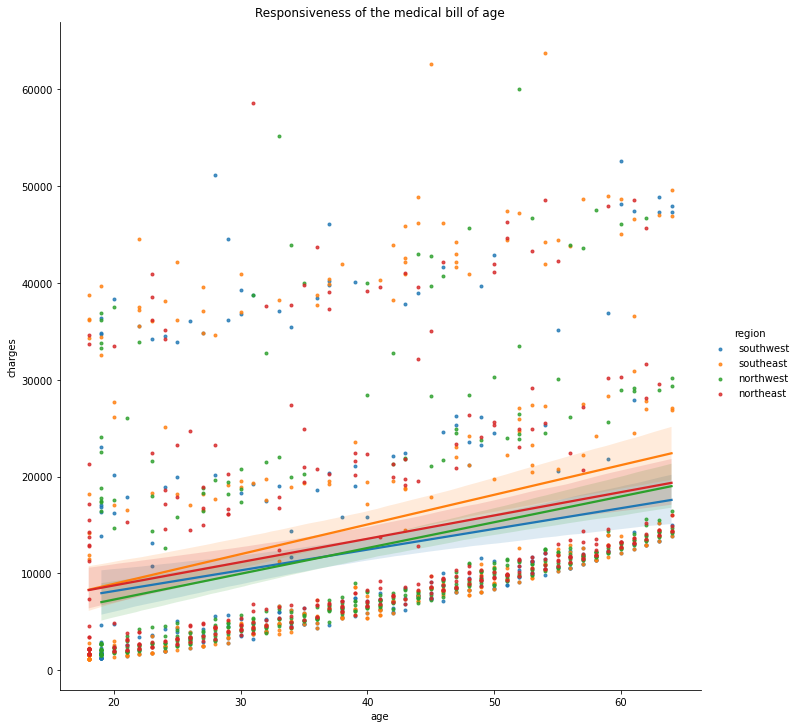

In [26]:
ax = plt.figure(figsize=(6,6))
sns.lmplot(x = 'age', y ='charges', data= df, markers = '.', hue ='region', height=10, aspect=1)
plt.title('Responsiveness of the medical bill of age')

In [27]:
ax = plt.figure(figsize=(15,6))
sns.lmplot(x ='age',y='bmi', data=df, markers='.', hue='sex', height=5, aspect=2)
plt.title('Age of distribution of BMI')
%matplotlib inline

<AxesSubplot:>

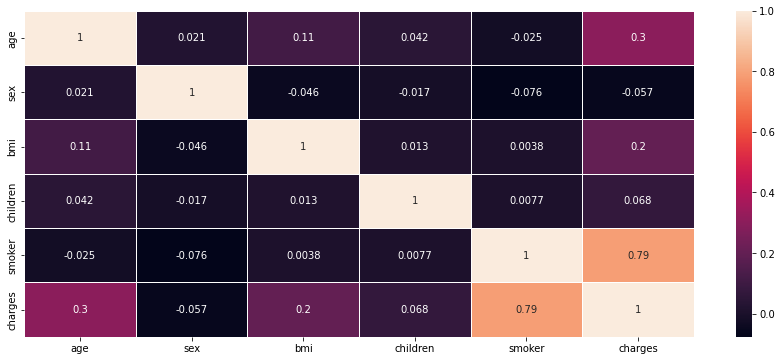

In [29]:
heatmap = df.corr()
ax = plt.figure(figsize=(15,6))
sns.heatmap(heatmap,linewidths=1, linecolor='white', annot =True)

In [30]:
df.drop(['region'], axis =1 , inplace= True)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [34]:
data_scaked = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [36]:
scaled = scaler.fit_transform(df)
print(scaled)

[[-1.43876426  1.0105187  -0.45332    -0.90861367  1.97058663  0.2985838 ]
 [-1.50996545 -0.98959079  0.5096211  -0.07876719 -0.5074631  -0.95368917]
 [-0.79795355 -0.98959079  0.38330685  1.58092576 -0.5074631  -0.72867467]
 ...
 [-1.50996545  1.0105187   1.0148781  -0.90861367 -0.5074631  -0.96159623]
 [-1.29636188  1.0105187  -0.79781341 -0.90861367 -0.5074631  -0.93036151]
 [ 1.55168573  1.0105187  -0.26138796 -0.90861367  1.97058663  1.31105347]]


In [38]:
x = df[['age','bmi','children']]
y = df['charges']

In [39]:
x1 = sm.add_constant(x)
results = sm.OLS(y,x1)

In [40]:
model =results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           8.80e-37
Time:                        09:12:29   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
xs =df['smoker']
xs1 =xs.values.reshape(-1,1)
# y=y.values.reshape

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test = train_test_split(xs1,y, test_size= 0.3)

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [46]:
lr.fit(x_train, y_train)

LinearRegression()

In [47]:
pred = lr.predict(x_test)

In [49]:
from sklearn.metrics import r2_score
r2=(r2_score(y_test,pred)*100)
r2

59.75875770483823

In [52]:
lr.score(x_test,y_test)*100

60.54032922743726

In [57]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [63]:
# indentifying the categorical variables
cat_var= df.select_dtypes(include= ["object"]).columns
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

Index([], dtype='object')


In [64]:
# replacing "unknown" with the mode
for column in cat_var:
    mode= data[column].mode()[0]
    data[column]= data[column].replace("unknown", mode)

In [66]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [67]:
# compute interquantile range to calculate the boundaries
lower_boundries= []
upper_boundries= []
for i in ['age', 'sex', 'bmi', 'children', 'smoker', 'charges']:
    IQR= df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bound= df[i].quantile(0.25) - (1.5*IQR)
    upper_bound= df[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

age : -9.0 , 87.0
sex : -1.5 , 2.5
bmi : 13.7 , 47.290000000000006
children : -3.0 , 5.0
smoker : 0.0 , 0.0
charges : -13109.1508975 , 34489.350562499996


In [68]:
lower_boundries

[-9.0, -1.5, 13.7, -3.0, 0.0, -13109.1508975]

In [69]:
upper_boundries

[87.0, 2.5, 47.290000000000006, 5.0, 0.0, 34489.350562499996]

In [70]:
# replace the all the outliers which is greater then upper boundary by upper boundary
j = 0
for i in ['age', 'sex', 'bmi', 'children', 'smoker', 'charges']:
    df.loc[df[i] > upper_boundries[j], i] = int(upper_boundries[j])
    j = j + 1  

<AxesSubplot:>

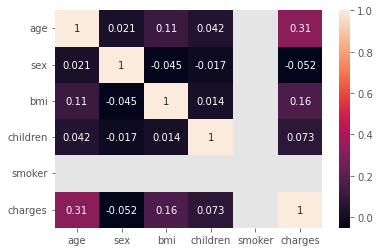

In [71]:
sns.heatmap(df.corr(),annot=True)

In [73]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.0,1338.000000
mean,39.207025,0.494768,30.648083,1.094918,0.0,12479.332832
std,14.049960,0.500160,6.051607,1.205493,0.0,10157.977127
min,18.000000,0.000000,15.960000,0.000000,0.0,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.0,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.0,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.0,16639.912515
max,64.000000,1.000000,47.000000,5.000000,0.0,34489.000000


In [74]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [77]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,0,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [79]:
y_train

640      6666.24300
413      5080.09600
236      1615.76670
19      36837.46700
793     21195.81800
           ...     
1099     3227.12110
1067     5757.41345
1070    39871.70430
186      3981.97680
318      7421.19455
Name: charges, Length: 936, dtype: float64

In [80]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,0,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [91]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
charges     float64
dtype: object

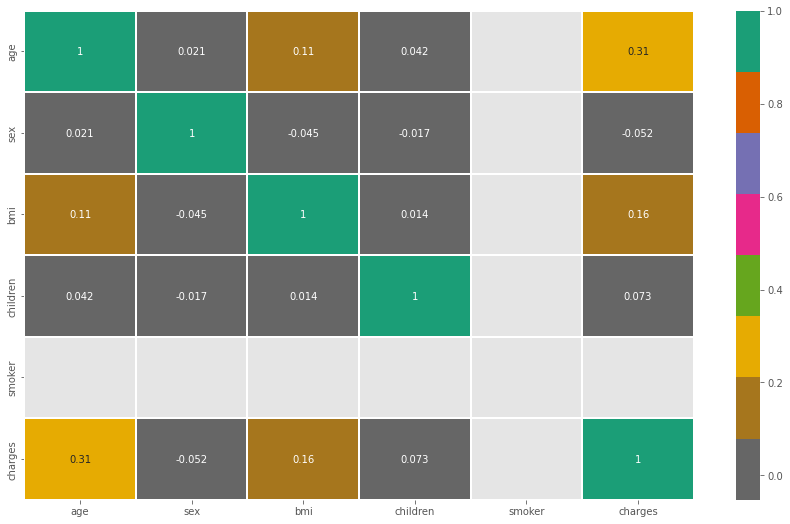

In [93]:
plt.figure(figsize=(15,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

In [94]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

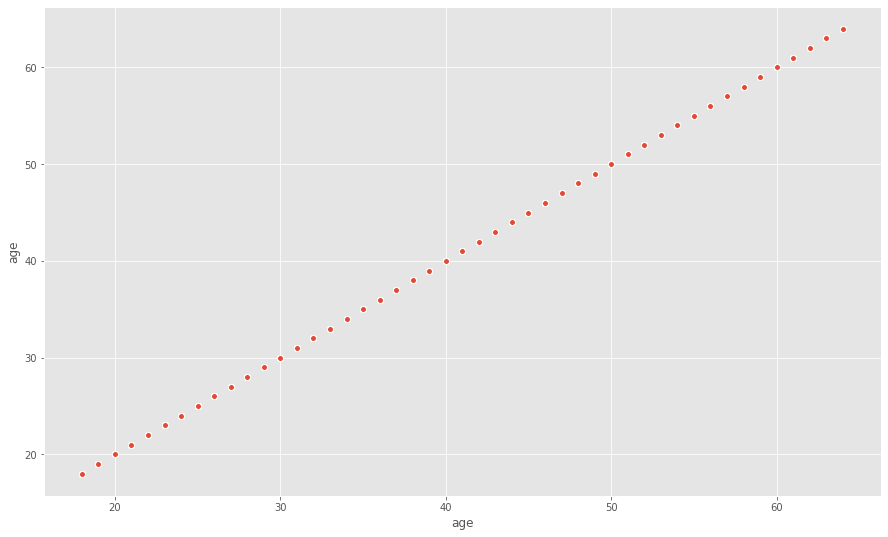

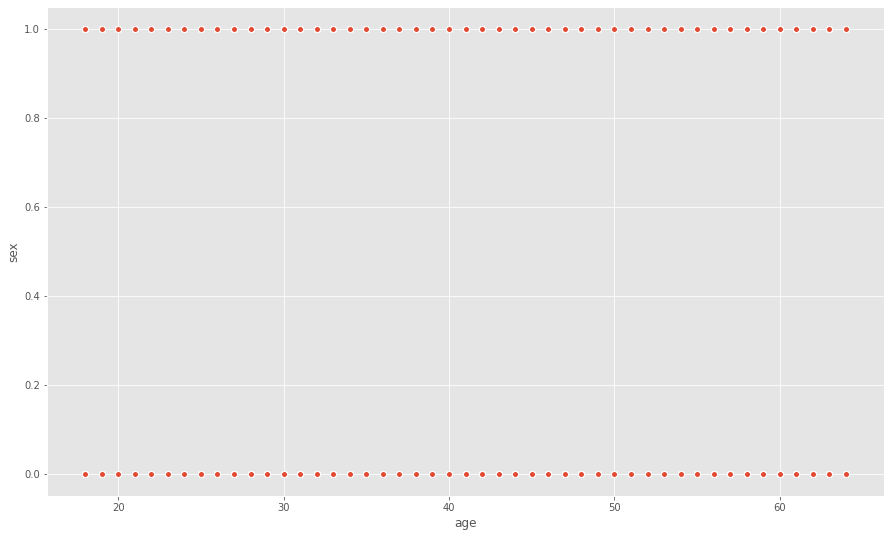

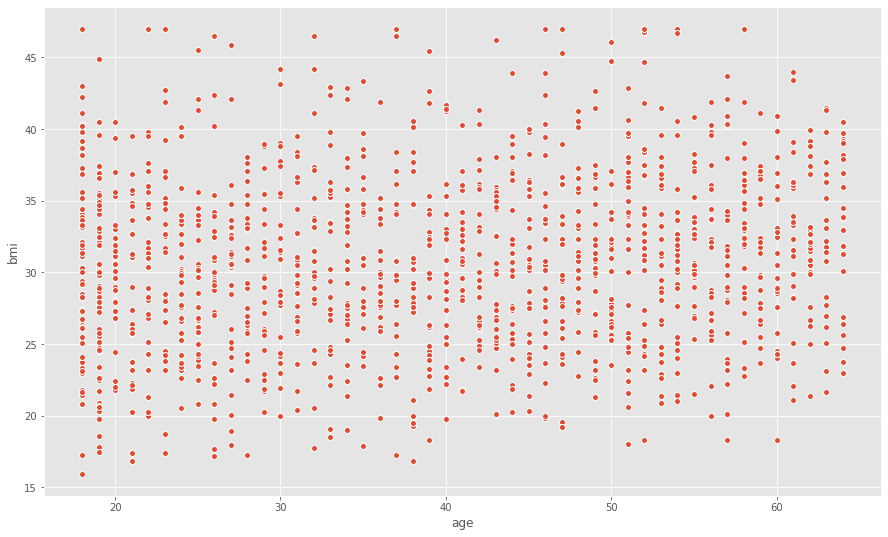

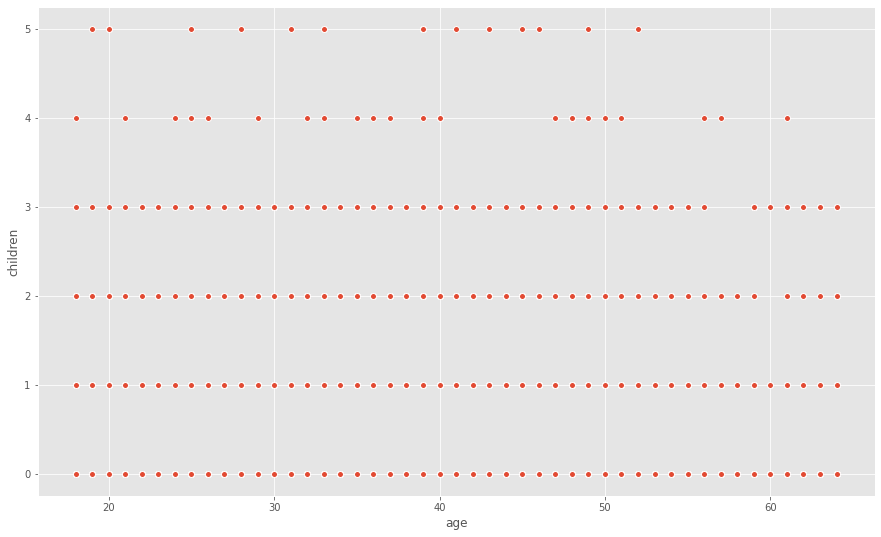

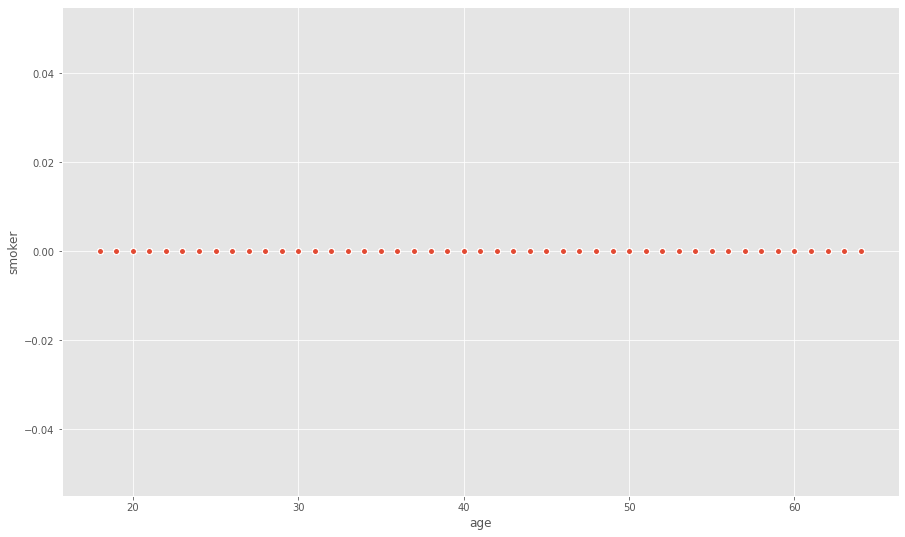

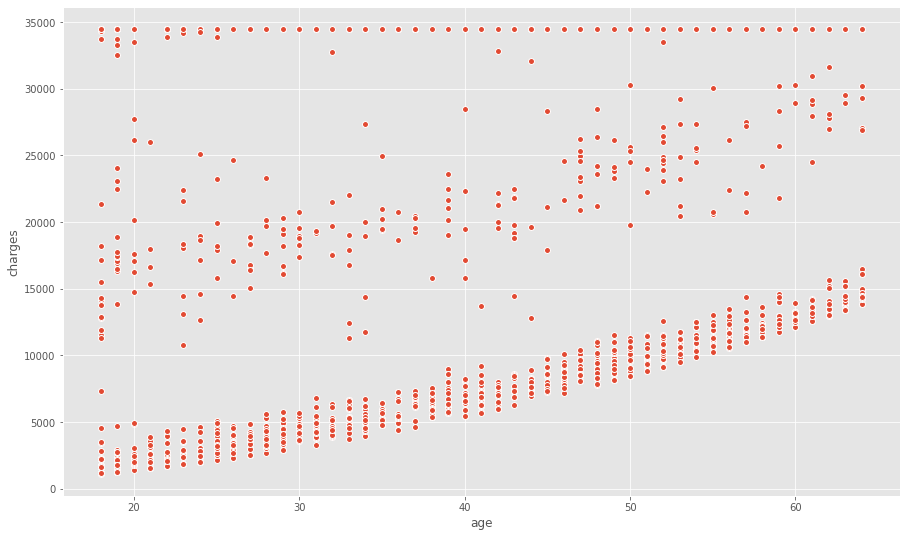

In [96]:
for i in ['age', 'sex', 'bmi', 'children', 'smoker', 'charges']:
    plt.figure(figsize=(15,9))
    sns.scatterplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

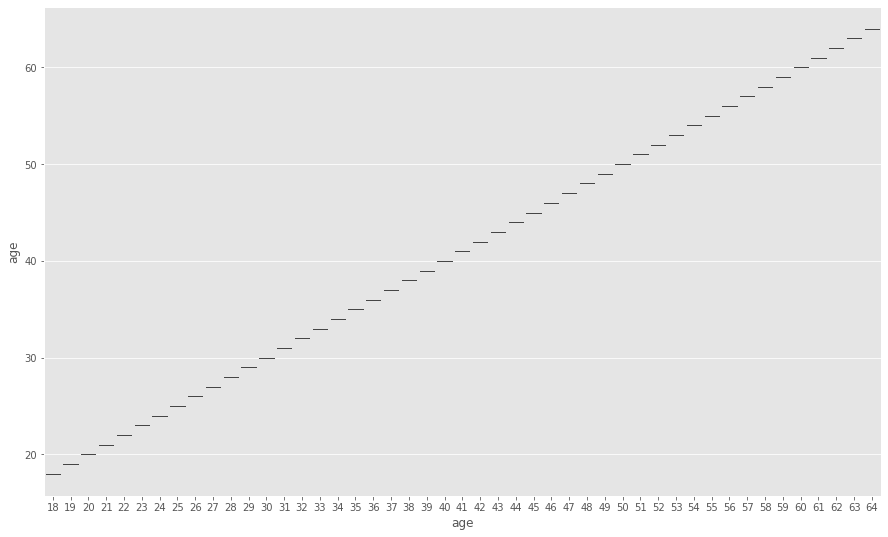

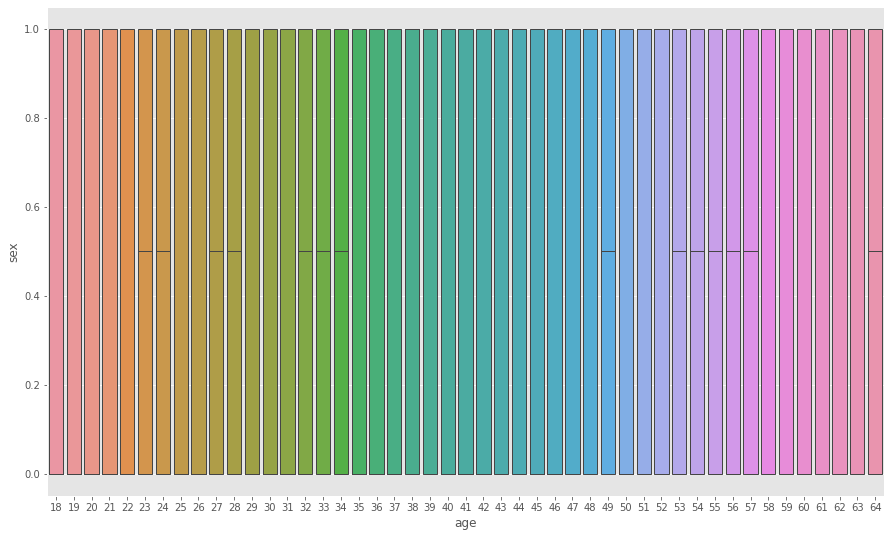

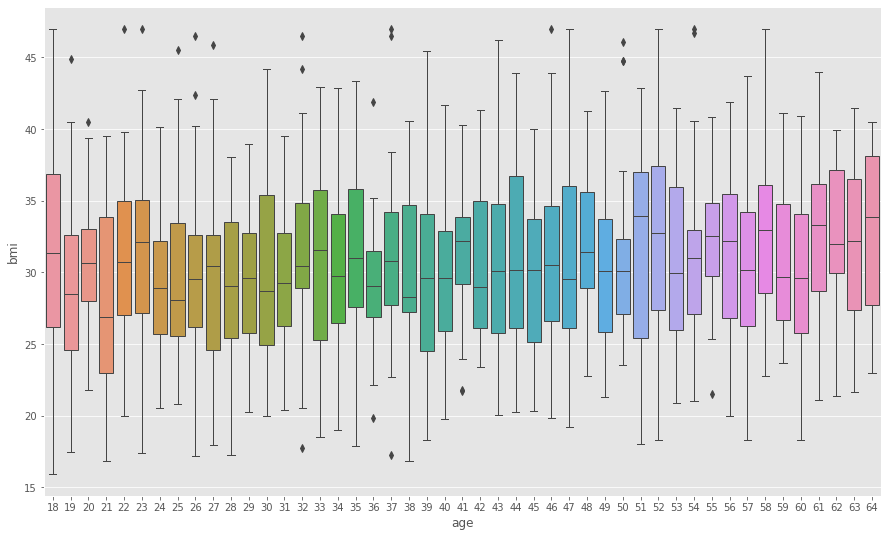

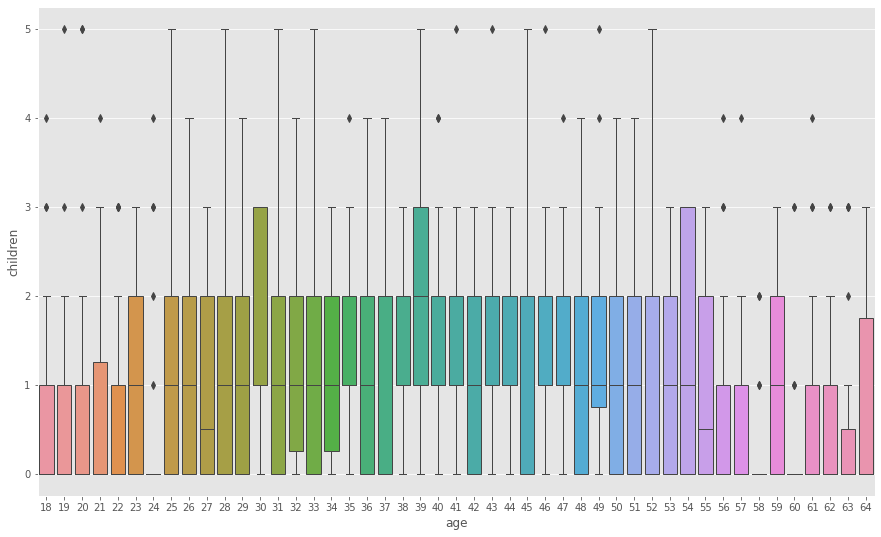

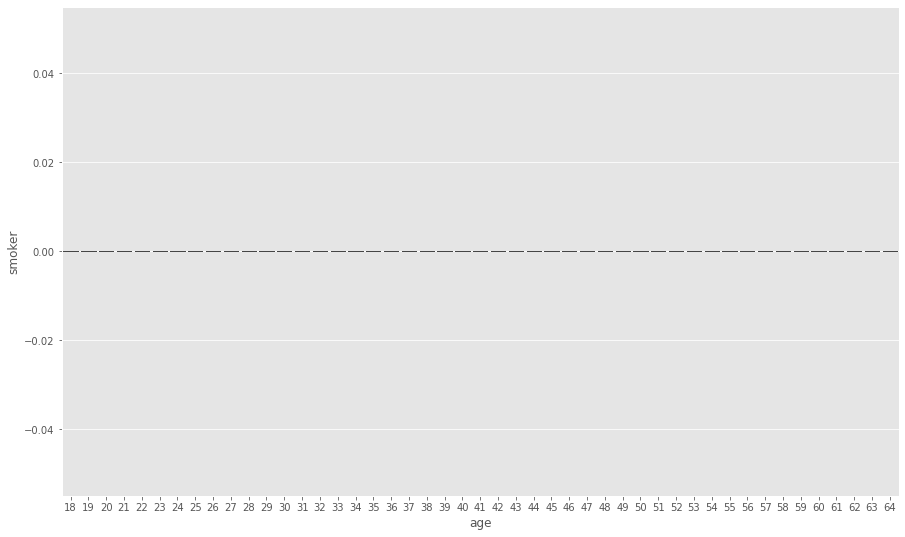

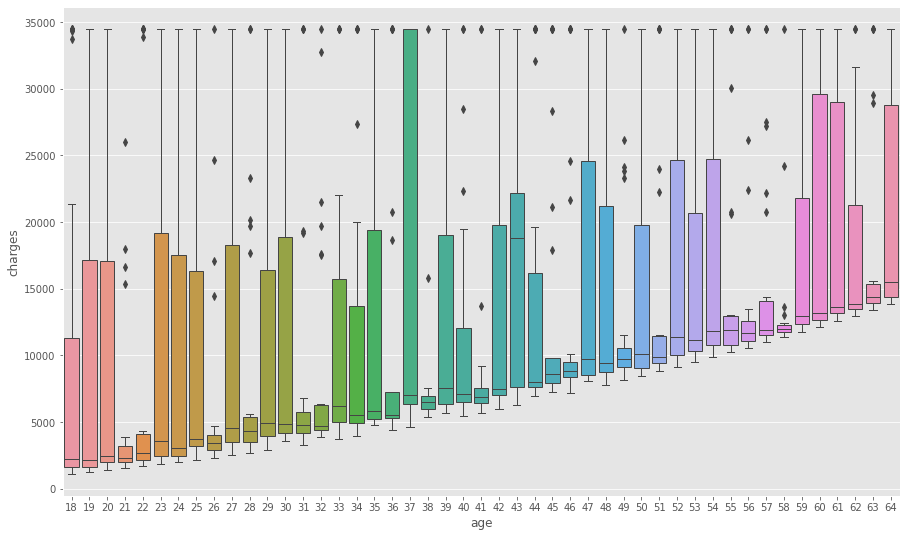

In [97]:
for i in ['age', 'sex', 'bmi', 'children', 'smoker', 'charges']:
    plt.figure(figsize=(15,9))
    sns.boxplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

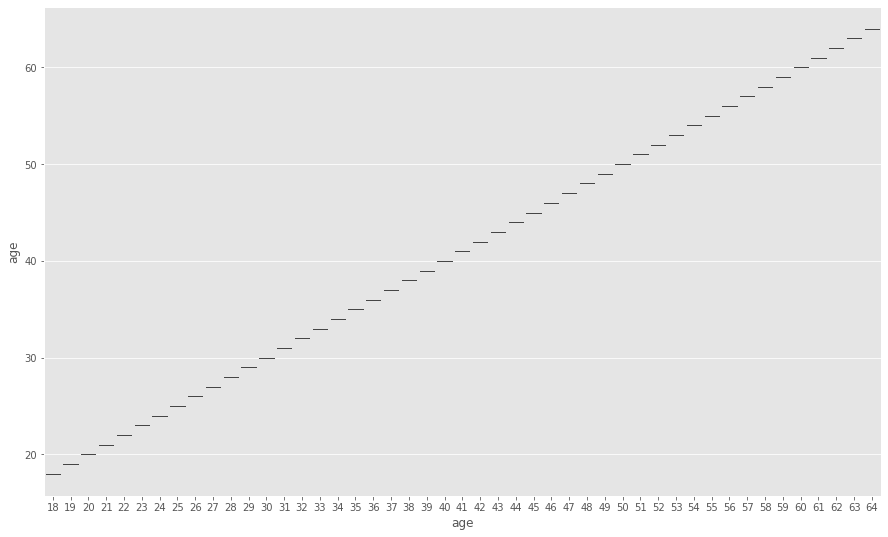

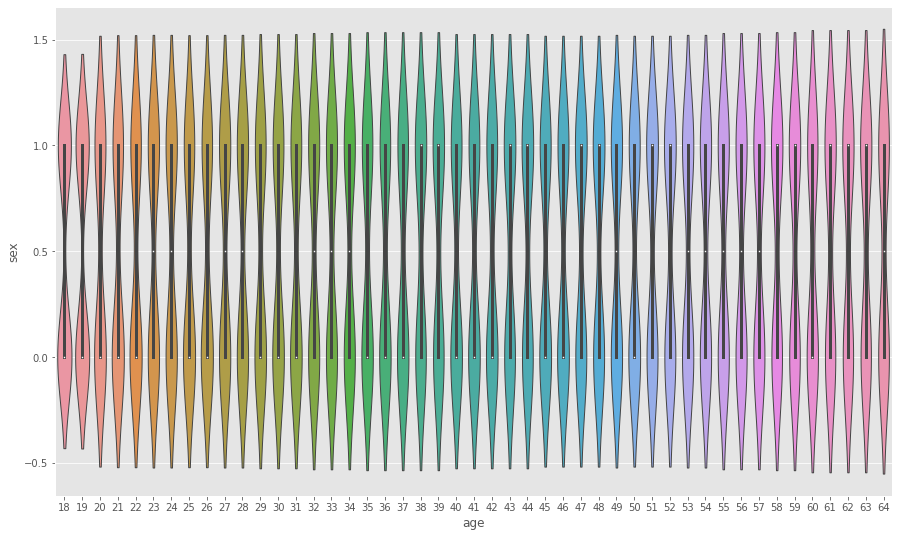

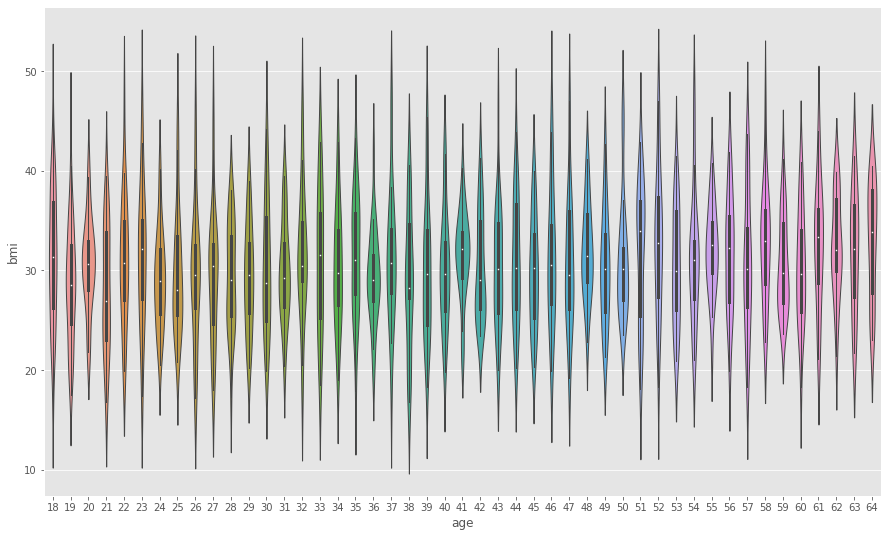

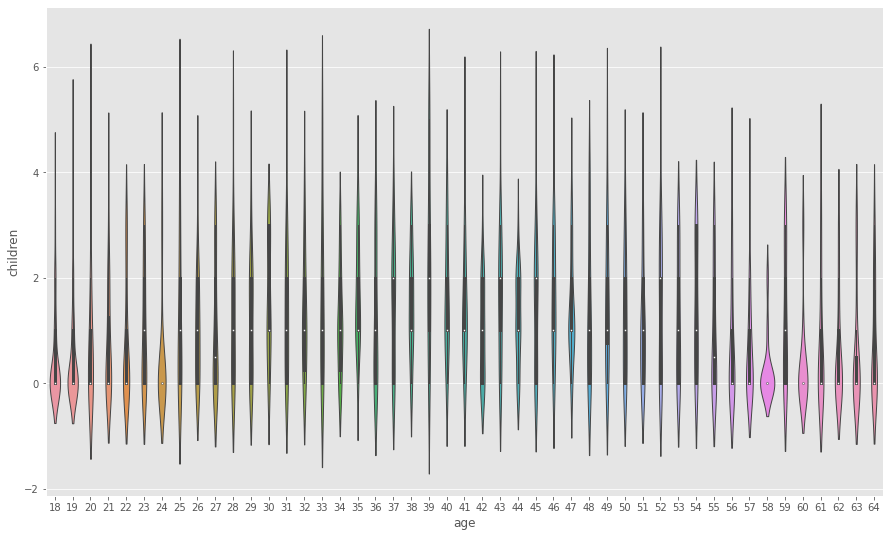

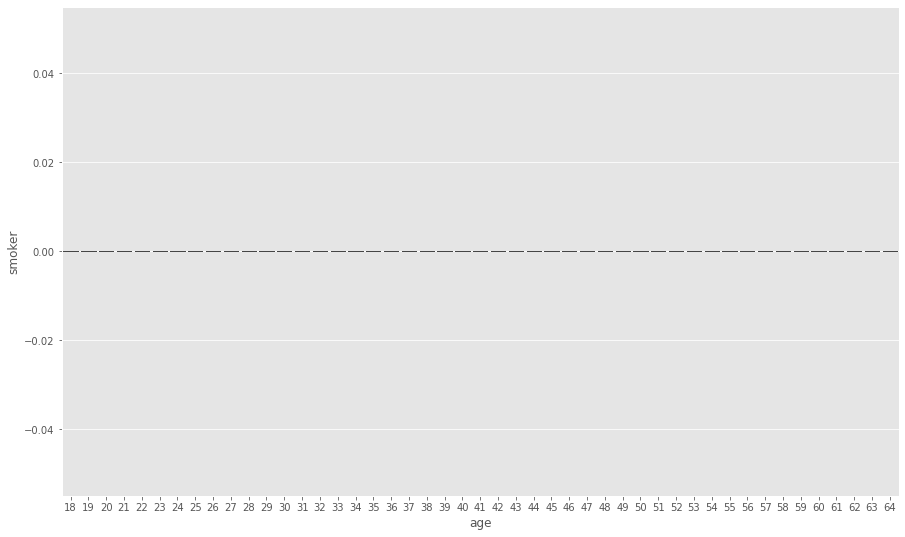

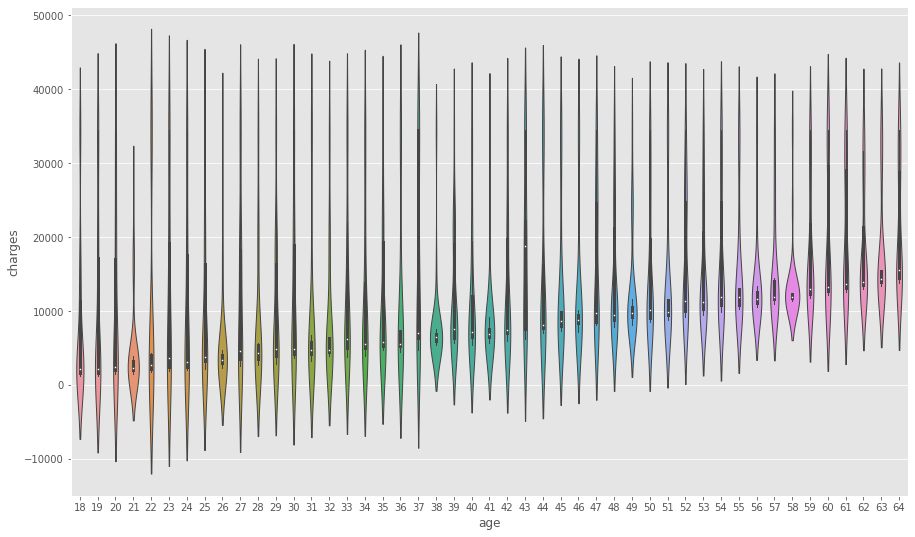

In [98]:
for i in ['age', 'sex', 'bmi', 'children', 'smoker', 'charges']:
    plt.figure(figsize=(15,9))
    sns.violinplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

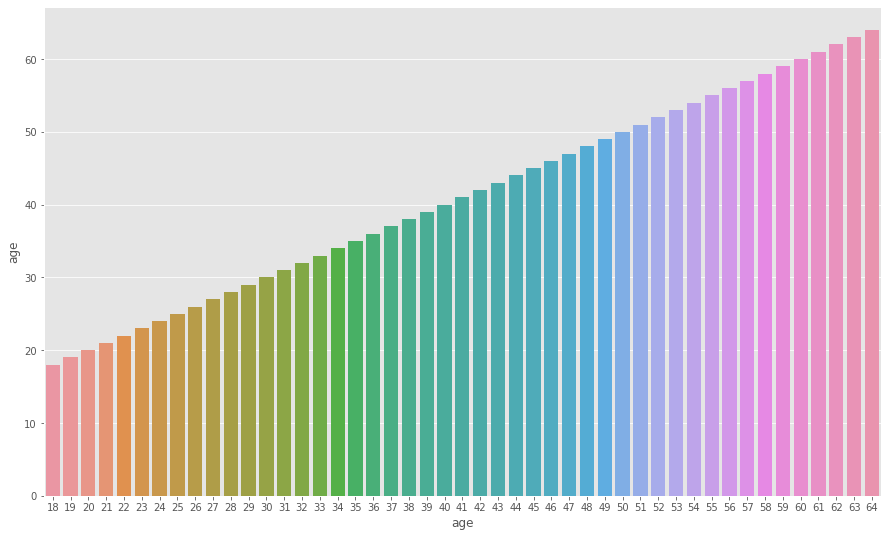

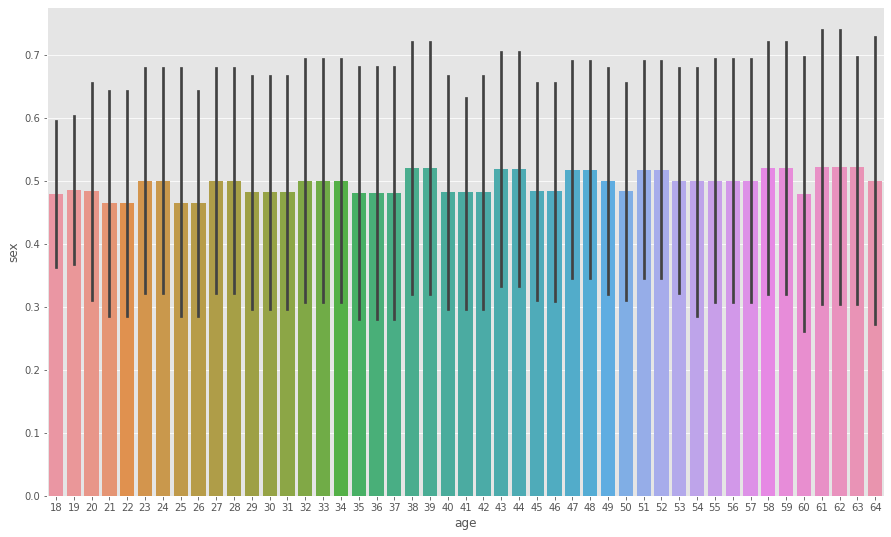

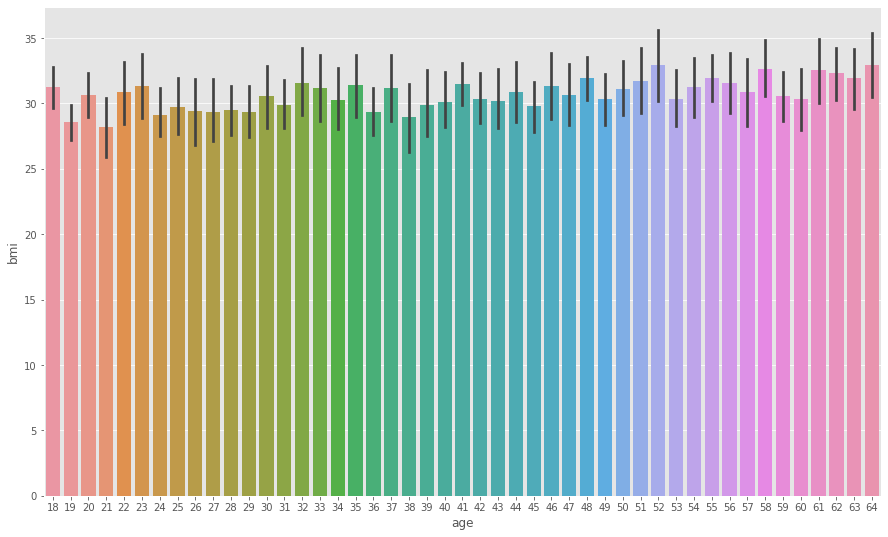

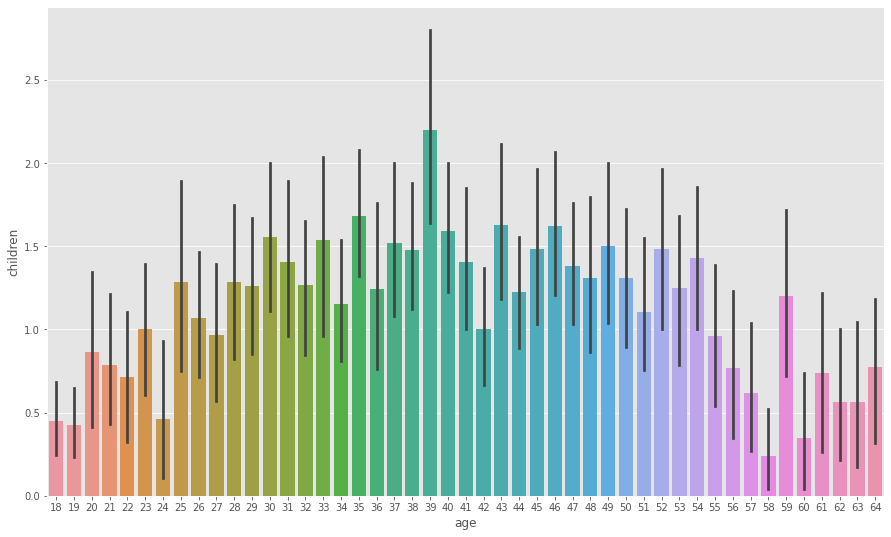

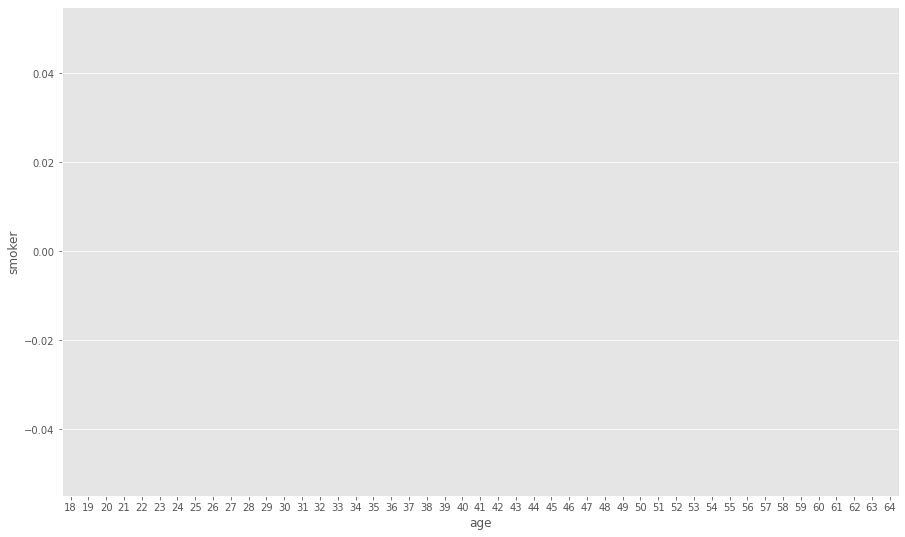

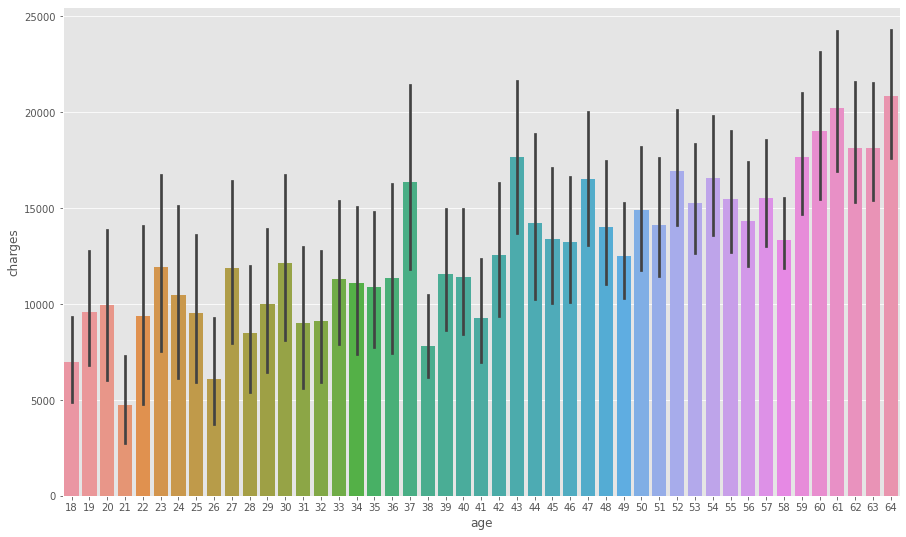

In [99]:
for i in ['age', 'sex', 'bmi', 'children', 'smoker', 'charges']:
    plt.figure(figsize=(15,9))
    sns.barplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

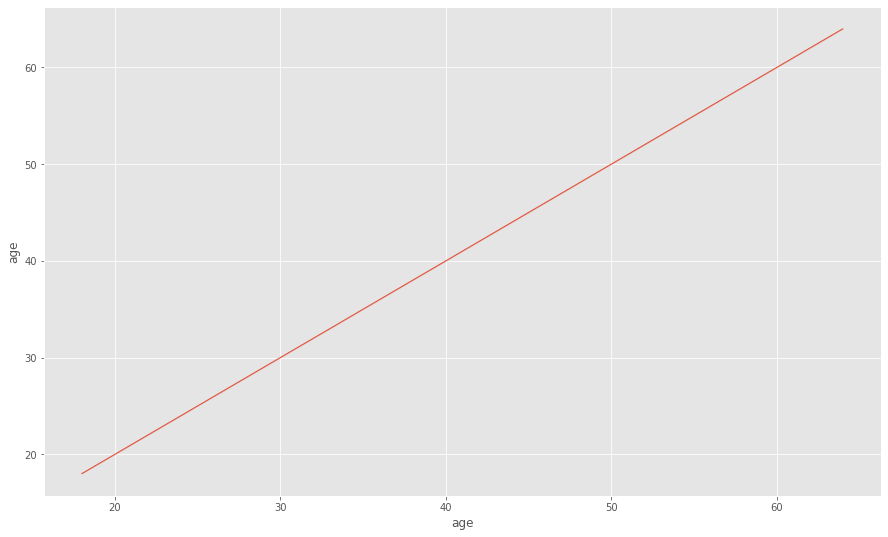

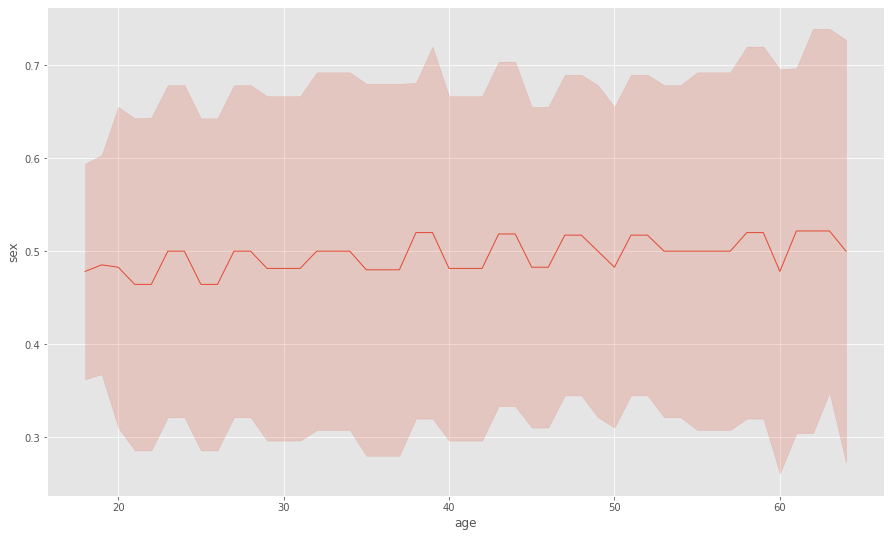

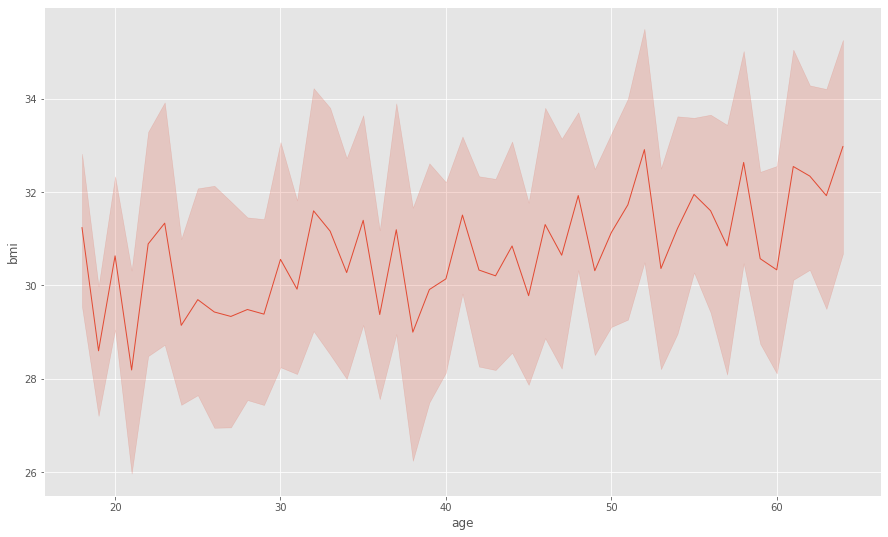

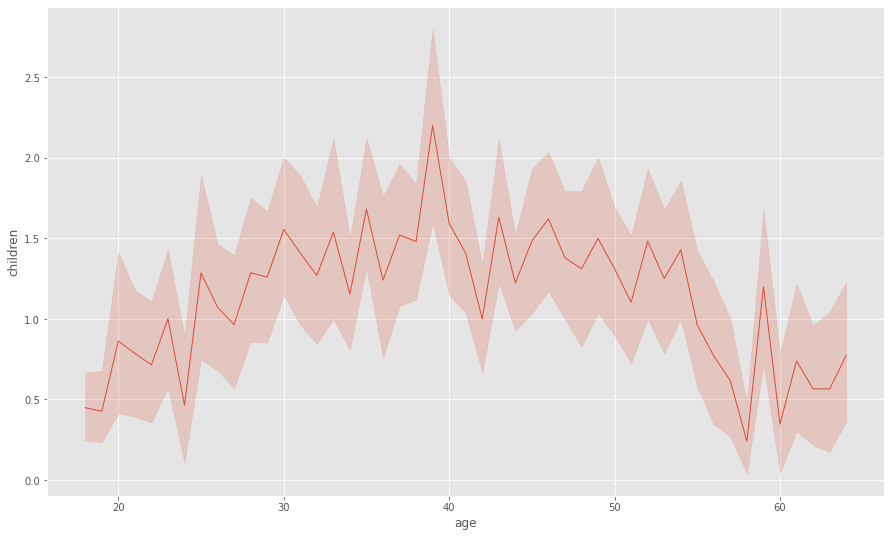

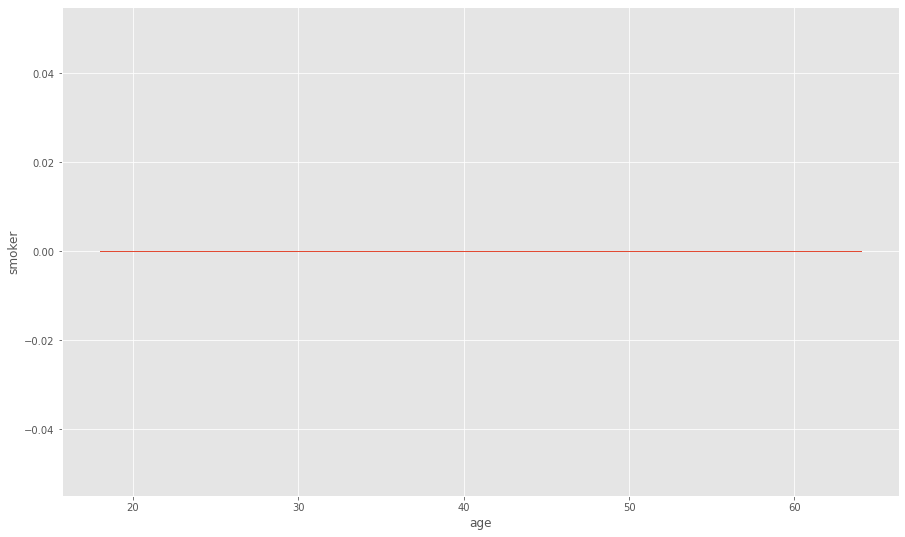

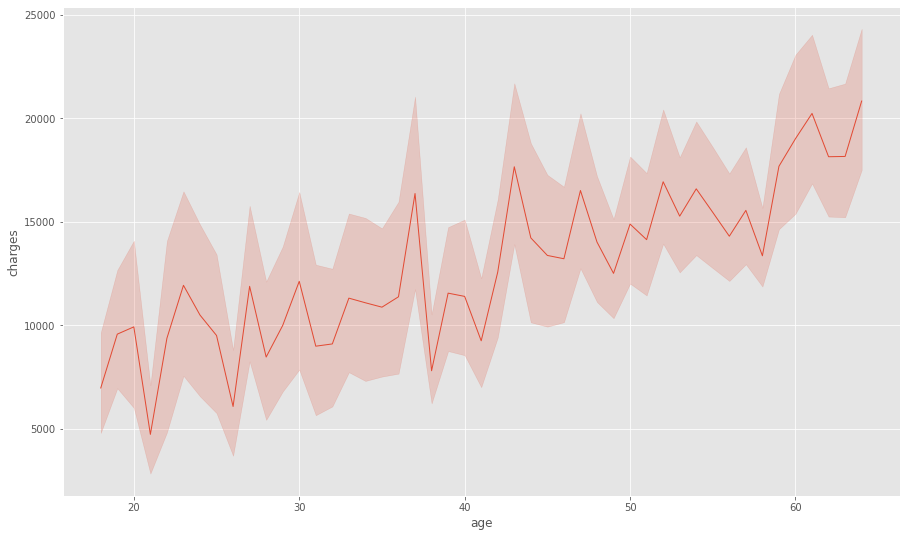

In [102]:
for i in ['age', 'sex', 'bmi', 'children', 'smoker', 'charges']:
    plt.figure(figsize=(15,9))
    sns.lineplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

<Figure size 1080x648 with 0 Axes>

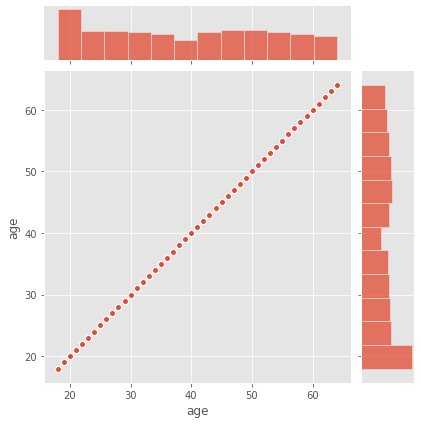

<Figure size 1080x648 with 0 Axes>

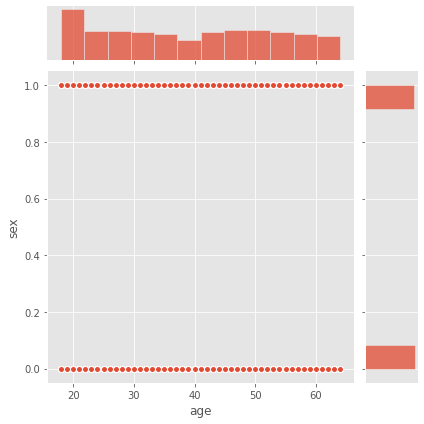

<Figure size 1080x648 with 0 Axes>

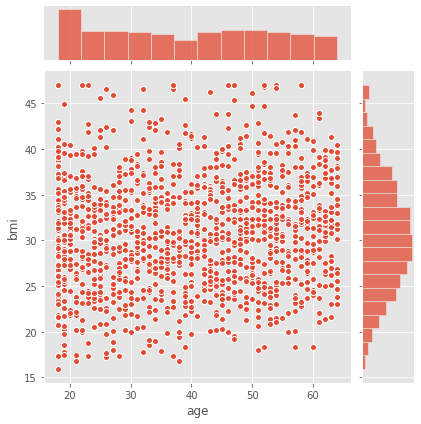

<Figure size 1080x648 with 0 Axes>

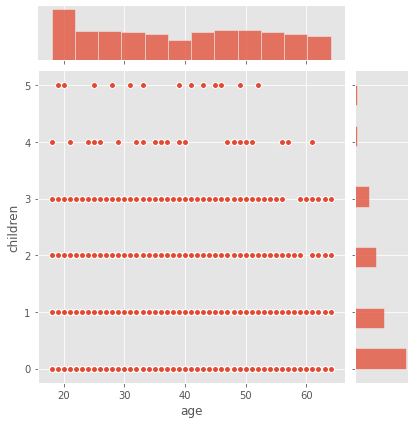

<Figure size 1080x648 with 0 Axes>

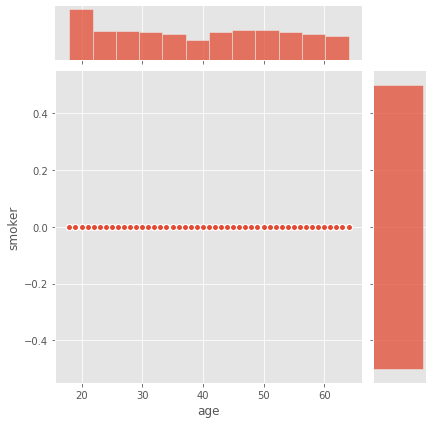

<Figure size 1080x648 with 0 Axes>

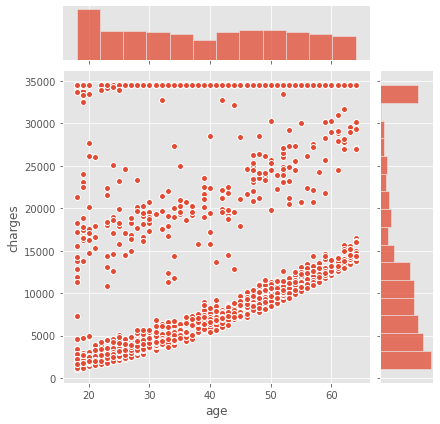

In [106]:
for i in ['age', 'sex', 'bmi', 'children', 'smoker', 'charges']:
    plt.figure(figsize=(15,9))
    sns.jointplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

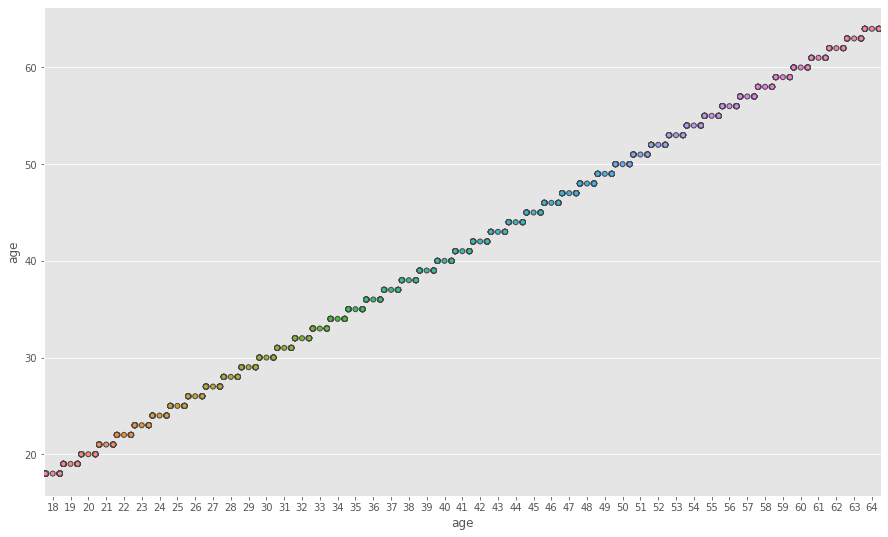

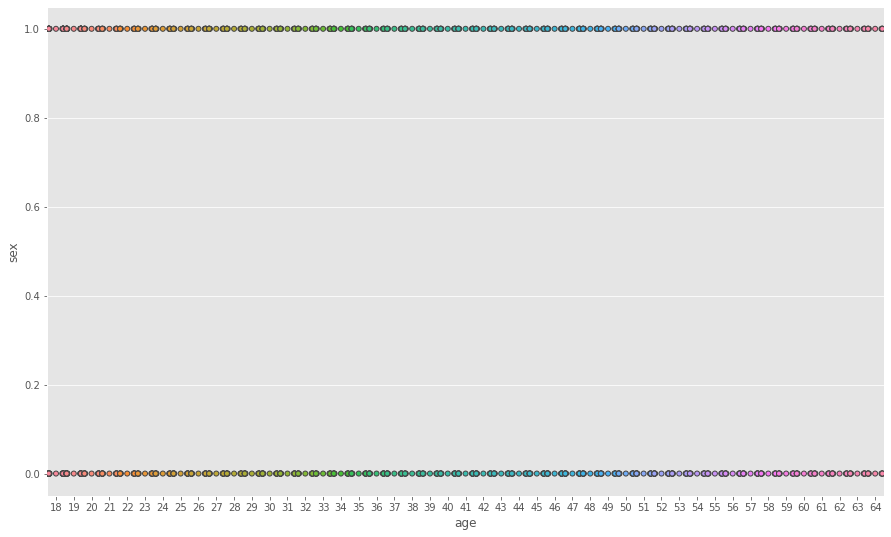

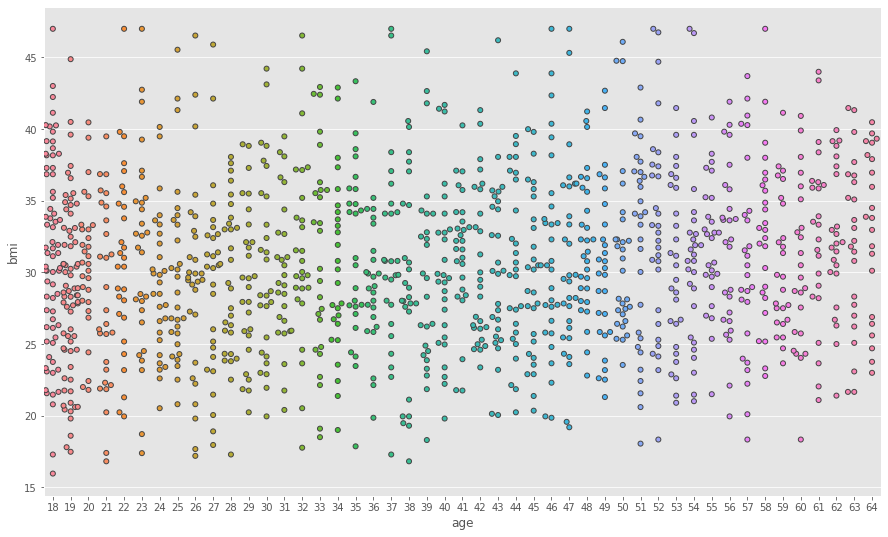

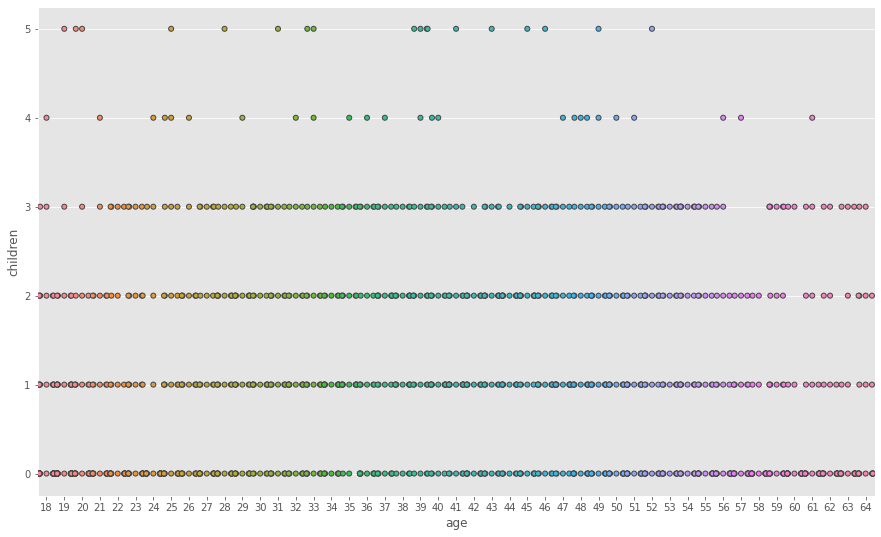

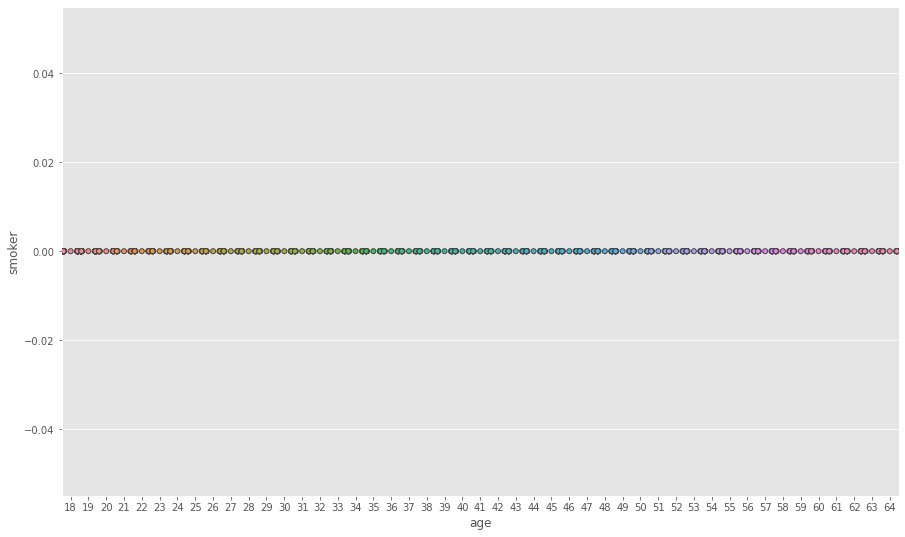

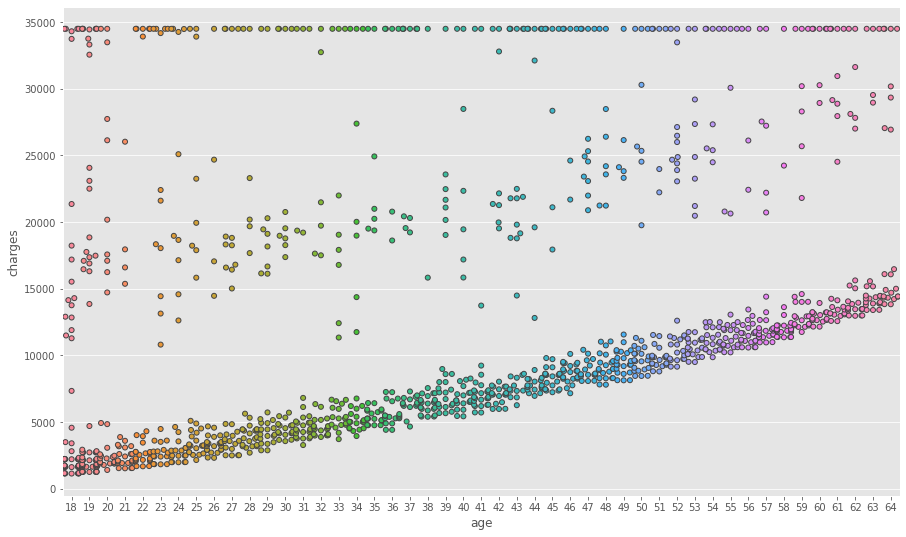

In [108]:
for i in ['age', 'sex', 'bmi', 'children', 'smoker', 'charges']:
    plt.figure(figsize=(15,9))
    sns.swarmplot(x=df.age,y=df[i],data=df,linewidth=1)
    plt.show()

In [109]:
import sweetviz as sv

In [111]:
data=sv.analyze(df)
data.show_html("Analyze.html")

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [113]:
from IPython.display import IFrame

In [114]:
IFrame(src='Analyze.html',width=1000,height=600)

In [117]:
import dtale
dtale.show(df)

Executing shutdown due to inactivity...


2022-03-26 12:19:17,656 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-03-26 12:19:21,795 - INFO     - Executing shutdown...
